In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import ttest_1samp,ttest_ind
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [163]:
df=pd.read_csv("bank_marketing_part1_Data.csv")

# Q.1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [164]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [165]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


1. 7 variables and 210 records.
2. No missing record based on intial analysis.
3. All the variables numeric type
4. Data shape is 210 rows and 7 columns.

In [167]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


1. Based on summary descriptive, the data looks good.
2. We see for most of the variable, mean/medium are nearly equal
3. Include a 90% to see variations and it looks distributely evenly
4. Std Deviation is high for spending variable

In [168]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

There are no missing values in the dataset

In [169]:
df.duplicated().sum()

0

There are no duplicates in the dataset

In [170]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [171]:
pca_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(pca_num.columns.values)
len(lstnumericcolumns)

7

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


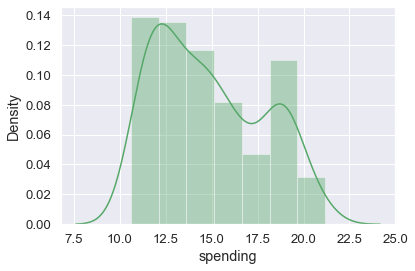

BoxPlot of spending
----------------------------------------------------------------------------


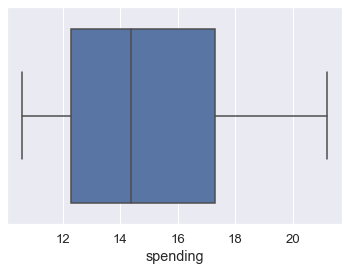

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


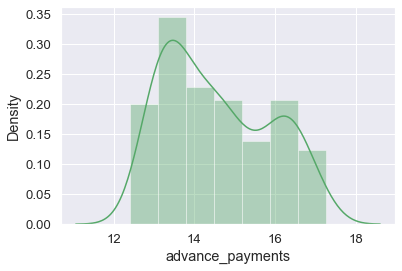

BoxPlot of advance_payments
----------------------------------------------------------------------------


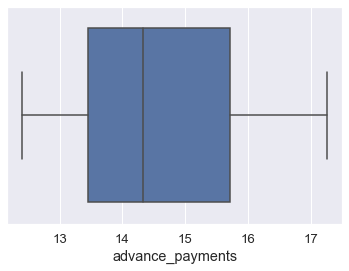

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


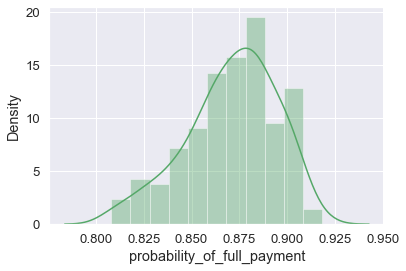

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


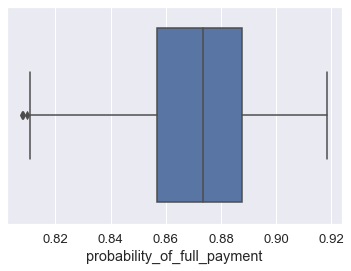

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


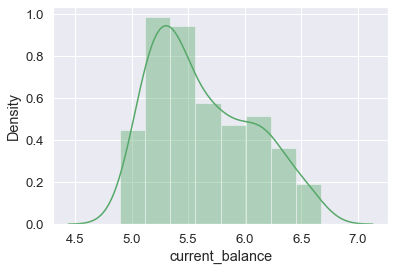

BoxPlot of current_balance
----------------------------------------------------------------------------


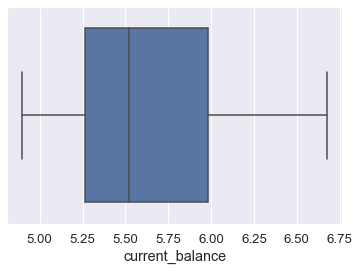

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


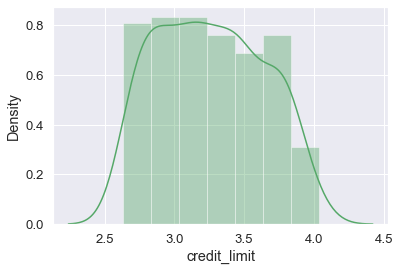

BoxPlot of credit_limit
----------------------------------------------------------------------------


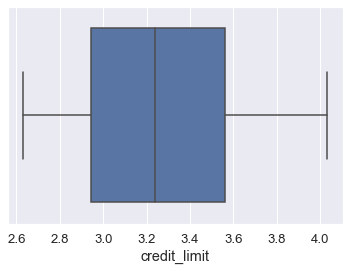

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


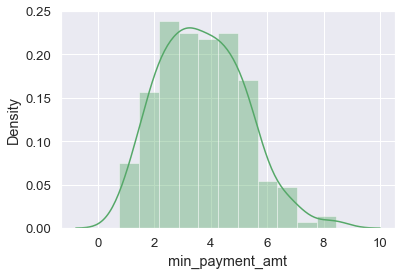

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


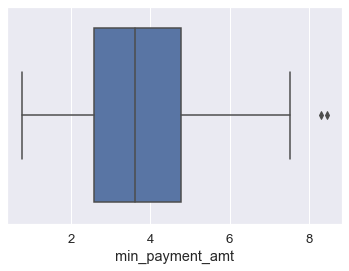

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


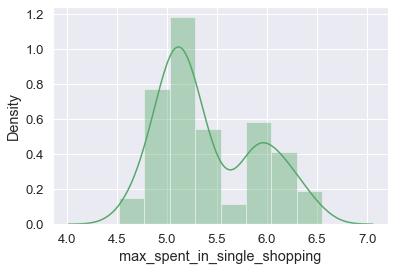

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


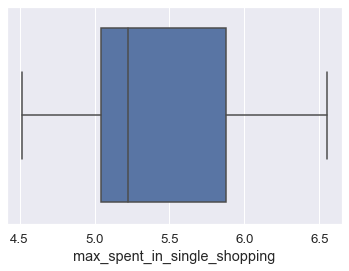

In [172]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

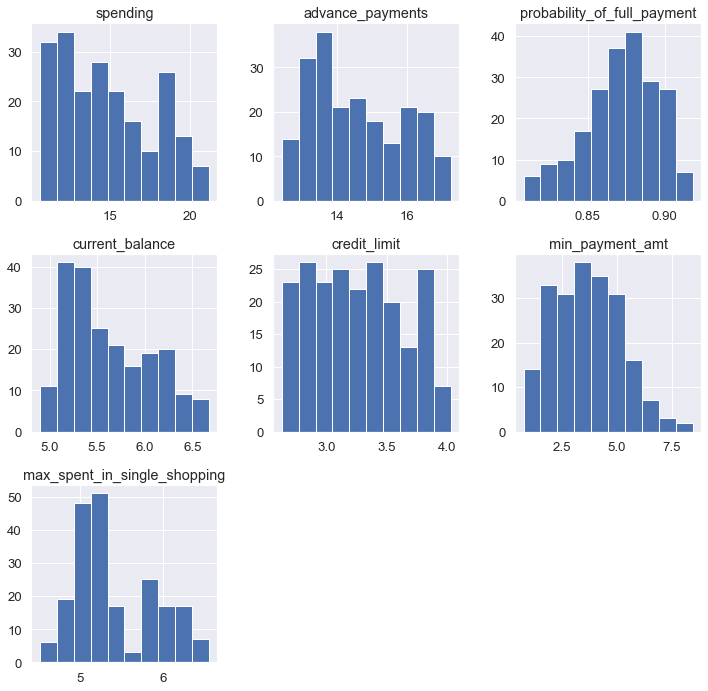

In [173]:
df.hist(figsize=(12,16),layout=(4,3),grid=True);

In [174]:
df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

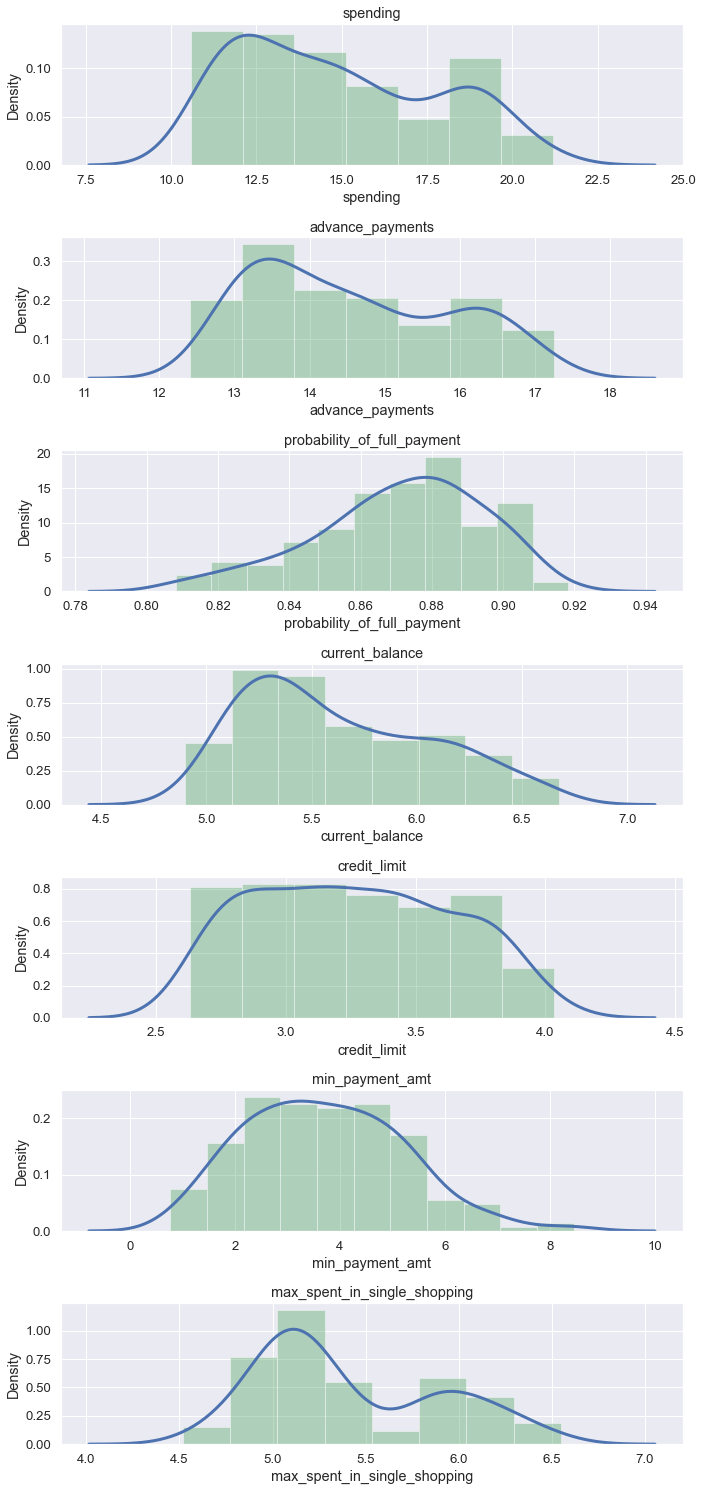

In [175]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

## Multi_Variate Analysis


<Figure size 1080x432 with 0 Axes>

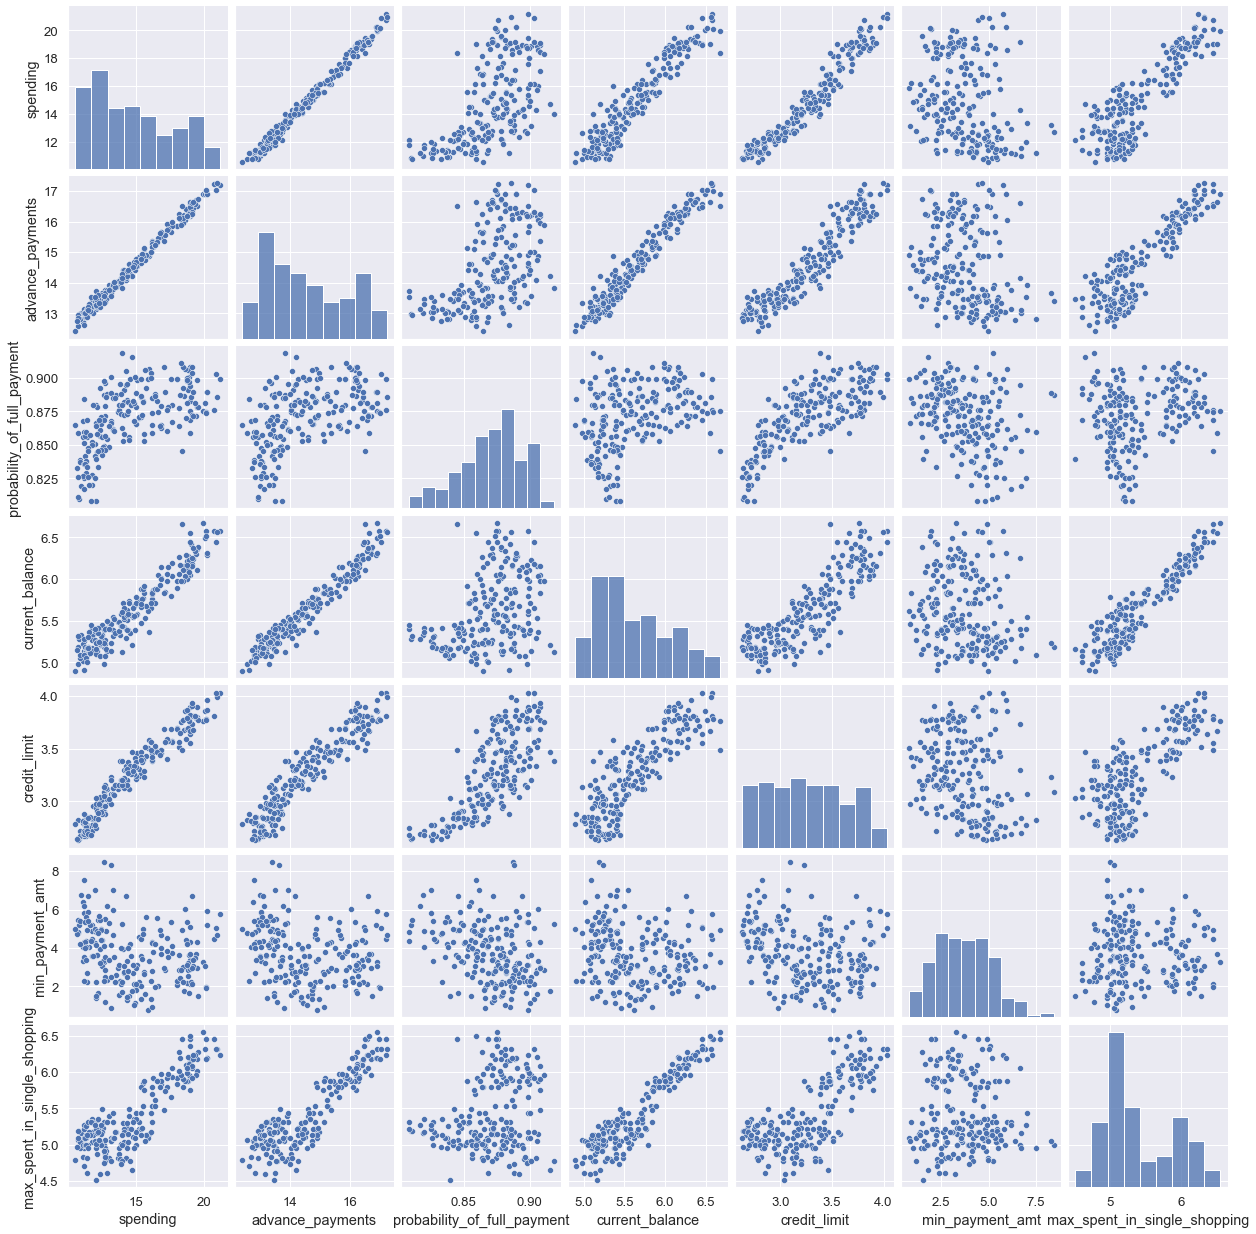

In [176]:
#Multivariate analysis
#Printing the Pairplot 
plt.figure(figsize=(15,6))
sns.pairplot(df);

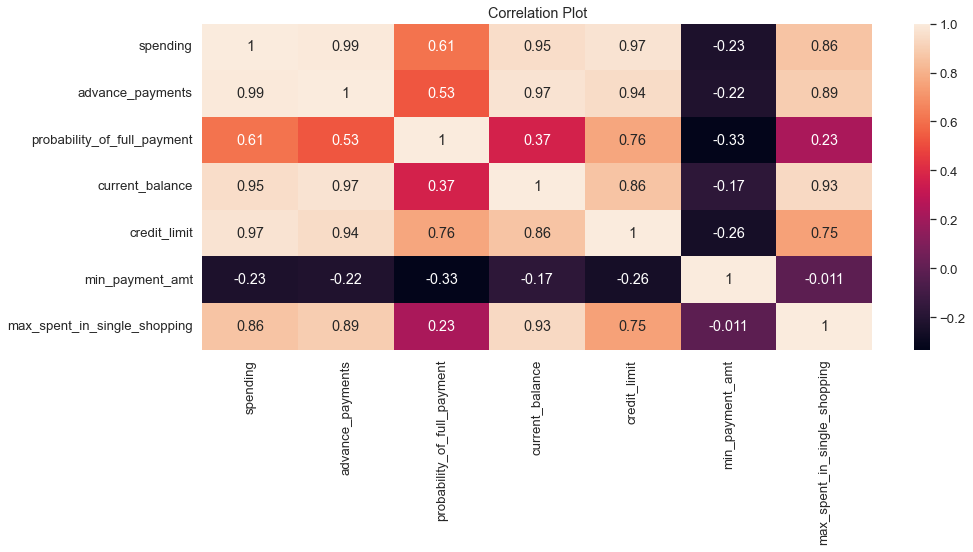

In [177]:
#Multivariate analysis
#Printing the correlation plot
corr=df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True)
plt.title("Correlation Plot");

# Inference from the Pairplot and Heatmap
Strong positive correlation between 
1. spending & advance_payments 0.99 , 
2. advance_payments & current_balance 0.97, 
3. credit_limit & spending 0.97,
4. spending & current_balance 0.95,
5. credit_limit & advance_payments 0.94,
6. max_spent_in_single_shopping & current_balance 0.93

In [178]:
# Removing the Outliers and replace with there particular medians
#Creating a copy od the original dataset
df_copy=df.copy()

## Extracting the Outliers for all the Variables

In [179]:
print("Extracting the Inter Quartile Range")
Q1=df['spending'].quantile(q=0.25)
Q3=df['spending'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of spending is ', stats.iqr(df['spending']))
print("")
print("Extracting the Outliers")
Lr_outliers=Q1-1.5*(Q3-Q1)
Ur_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ', Lr_outliers)
print('Upper outliers in spending: ', Ur_outliers)
print("")
print("Extracting the number of outliers in spending Variable")
print('Number of outliers in spending upper : ', df[df['spending']>24.8575]['spending'].count())
print('Number of outliers in spending lower : ', df[df['spending']<4.717499]['spending'].count())
print('% of Outlier in spending upper: ',round(df[df['spending']>24.8575]['spending'].count()*100/len(df)), '%')
print('% of Outlier in spending lower: ',round(df[df['spending']<4.717499]['spending'].count()*100/len(df)), '%')

Extracting the Inter Quartile Range
spending - 1st Quartile (Q1) is:  12.27
spending - 3st Quartile (Q3) is:  17.305
Interquartile range (IQR) of spending is  5.035

Extracting the Outliers
Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575

Extracting the number of outliers in spending Variable
Number of outliers in spending upper :  0
Number of outliers in spending lower :  0
% of Outlier in spending upper:  0 %
% of Outlier in spending lower:  0 %


In [180]:
print("Extracting the Inter Quartile Range")
Q1=df['advance_payments'].quantile(q=0.25)
Q3=df['advance_payments'].quantile(q=0.75)
print('advance_payments  - 1st Quartile (Q1) is: ', Q1)
print('advance_payments  - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of advance_payments  is ', stats.iqr(df['advance_payments']))
print("")
print("Extracting the Outliers")
Lr_outliers=Q1-1.5*(Q3-Q1)
Ur_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments : ', Lr_outliers)
print('Upper outliers in advance_payments : ', Ur_outliers)
print("")
print("Extracting the number of outliers in advance_payments Variable")
print('Number of outliers in advance_payments  upper : ', df[df['advance_payments']>19.11]['advance_payments'].count())
print('Number of outliers in advance_payments  lower : ', df[df['advance_payments']<10.05]['advance_payments'].count())
print('% of Outlier in advance_payments  upper: ',round(df[df['advance_payments']>19.11]['advance_payments'].count()*100/len(df)), '%')
print('% of Outlier in advance_payments  lower: ',round(df[df['advance_payments']<10.05]['advance_payments'].count()*100/len(df)), '%')

Extracting the Inter Quartile Range
advance_payments  - 1st Quartile (Q1) is:  13.45
advance_payments  - 3st Quartile (Q3) is:  15.715
Interquartile range (IQR) of advance_payments  is  2.2650000000000006

Extracting the Outliers
Lower outliers in advance_payments :  10.052499999999998
Upper outliers in advance_payments :  19.1125

Extracting the number of outliers in advance_payments Variable
Number of outliers in advance_payments  upper :  0
Number of outliers in advance_payments  lower :  0
% of Outlier in advance_payments  upper:  0 %
% of Outlier in advance_payments  lower:  0 %


In [181]:
print("Extracting the Inter Quartile Range")
Q1=df['probability_of_full_payment'].quantile(q=0.25)
Q3=df['probability_of_full_payment'].quantile(q=0.75)
print('probability_of_full_payment  - 1st Quartile (Q1) is: ', Q1)
print('probability_of_full_payment  - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of probability_of_full_payment  is ', stats.iqr(df['probability_of_full_payment']))
print("")
print("Extracting the Outliers")
Lr_outliers=Q1-1.5*(Q3-Q1)
Ur_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment : ', Lr_outliers)
print('Upper outliers in probability_of_full_payment : ', Ur_outliers)
print("")
print("Extracting the number of outliers in probability_of_full_payment Variable")
print('Number of outliers in probability_of_full_payment  upper : ', df[df['probability_of_full_payment']>0.93]['probability_of_full_payment'].count())
print('Number of outliers in probability_of_full_payment  lower : ', df[df['probability_of_full_payment']<0.81]['probability_of_full_payment'].count())
print('% of Outlier in probability_of_full_payment  upper: ',round(df[df['probability_of_full_payment']>0.93]['probability_of_full_payment'].count()*100/len(df)), '%')
print('% of Outlier in probability_of_full_payment  lower: ',round(df[df['probability_of_full_payment']<0.81]['probability_of_full_payment'].count()*100/len(df)), '%')

Extracting the Inter Quartile Range
probability_of_full_payment  - 1st Quartile (Q1) is:  0.8569
probability_of_full_payment  - 3st Quartile (Q3) is:  0.887775
Interquartile range (IQR) of probability_of_full_payment  is  0.030874999999999986

Extracting the Outliers
Lower outliers in probability_of_full_payment :  0.8105875
Upper outliers in probability_of_full_payment :  0.9340875

Extracting the number of outliers in probability_of_full_payment Variable
Number of outliers in probability_of_full_payment  upper :  0
Number of outliers in probability_of_full_payment  lower :  3
% of Outlier in probability_of_full_payment  upper:  0 %
% of Outlier in probability_of_full_payment  lower:  1 %


In [182]:
print("Extracting the Inter Quartile Range")
Q1=df['current_balance'].quantile(q=0.25)
Q3=df['current_balance'].quantile(q=0.75)
print('current_balance  - 1st Quartile (Q1) is: ', Q1)
print('current_balance  - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of current_balance  is ', stats.iqr(df['current_balance']))
print("")
print("Extracting the Outliers")
Lr_outliers=Q1-1.5*(Q3-Q1)
Ur_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance : ', Lr_outliers)
print('Upper outliers in current_balance : ', Ur_outliers)
print("")
print("Extracting the number of outliers in current_balance Variable")
print('Number of outliers in current_balance  upper : ', df[df['current_balance']>7.05]['current_balance'].count())
print('Number of outliers in current_balance  lower : ', df[df['current_balance']<4.18]['current_balance'].count())
print('% of Outlier in current_balance  upper: ',round(df[df['current_balance']>7.05]['current_balance'].count()*100/len(df)), '%')
print('% of Outlier in current_balance  lower: ',round(df[df['current_balance']<4.18]['current_balance'].count()*100/len(df)), '%')

Extracting the Inter Quartile Range
current_balance  - 1st Quartile (Q1) is:  5.26225
current_balance  - 3st Quartile (Q3) is:  5.97975
Interquartile range (IQR) of current_balance  is  0.7175000000000002

Extracting the Outliers
Lower outliers in current_balance :  4.186
Upper outliers in current_balance :  7.056000000000001

Extracting the number of outliers in current_balance Variable
Number of outliers in current_balance  upper :  0
Number of outliers in current_balance  lower :  0
% of Outlier in current_balance  upper:  0 %
% of Outlier in current_balance  lower:  0 %


In [183]:
print("Extracting the Inter Quartile Range")
Q1=df['credit_limit'].quantile(q=0.25)
Q3=df['credit_limit'].quantile(q=0.75)
print('credit_limit  - 1st Quartile (Q1) is: ', Q1)
print('credit_limit  - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of credit_limit  is ', stats.iqr(df['credit_limit']))
print("")
print("Extracting the Outliers")
Lr_outliers=Q1-1.5*(Q3-Q1)
Ur_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit : ', Lr_outliers)
print('Upper outliers in credit_limit : ', Ur_outliers)
print("")
print("Extracting the number of outliers in credit_limit Variable")
print('Number of outliers in credit_limit  upper : ', df[df['credit_limit']>4.48]['credit_limit'].count())
print('Number of outliers in credit_limit  lower : ', df[df['credit_limit']<2.01]['credit_limit'].count())
print('% of Outlier in credit_limit  upper: ',round(df[df['credit_limit']>4.48]['credit_limit'].count()*100/len(df)), '%')
print('% of Outlier in credit_limit  lower: ',round(df[df['credit_limit']<2.01]['credit_limit'].count()*100/len(df)), '%')

Extracting the Inter Quartile Range
credit_limit  - 1st Quartile (Q1) is:  2.944
credit_limit  - 3st Quartile (Q3) is:  3.56175
Interquartile range (IQR) of credit_limit  is  0.61775

Extracting the Outliers
Lower outliers in credit_limit :  2.017375
Upper outliers in credit_limit :  4.488375

Extracting the number of outliers in credit_limit Variable
Number of outliers in credit_limit  upper :  0
Number of outliers in credit_limit  lower :  0
% of Outlier in credit_limit  upper:  0 %
% of Outlier in credit_limit  lower:  0 %


In [184]:
print("Extracting the Inter Quartile Range")
Q1=df['min_payment_amt'].quantile(q=0.25)
Q3=df['min_payment_amt'].quantile(q=0.75)
print('min_payment_amt  - 1st Quartile (Q1) is: ', Q1)
print('min_payment_amt  - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of min_payment_amt  is ', stats.iqr(df['min_payment_amt']))
print("")
print("Extracting the Outliers")
Lr_outliers=Q1-1.5*(Q3-Q1)
Ur_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt : ', Lr_outliers)
print('Upper outliers in min_payment_amt : ', Ur_outliers)
print("")
print("Extracting the number of outliers in min_payment_amt Variable")
print('Number of outliers in min_payment_amt  upper : ', df[df['min_payment_amt']>8.07]['min_payment_amt'].count())
print('Number of outliers in min_payment_amt  lower : ', df[df['min_payment_amt']<-0.74]['min_payment_amt'].count())
print('% of Outlier in min_payment_amt  upper: ',round(df[df['min_payment_amt']>8.07]['min_payment_amt'].count()*100/len(df)), '%')
print('% of Outlier in min_payment_amt  lower: ',round(df[df['min_payment_amt']<-0.74]['min_payment_amt'].count()*100/len(df)), '%')

Extracting the Inter Quartile Range
min_payment_amt  - 1st Quartile (Q1) is:  2.5615
min_payment_amt  - 3st Quartile (Q3) is:  4.76875
Interquartile range (IQR) of min_payment_amt  is  2.2072499999999997

Extracting the Outliers
Lower outliers in min_payment_amt :  -0.7493749999999992
Upper outliers in min_payment_amt :  8.079625

Extracting the number of outliers in min_payment_amt Variable
Number of outliers in min_payment_amt  upper :  2
Number of outliers in min_payment_amt  lower :  0
% of Outlier in min_payment_amt  upper:  1 %
% of Outlier in min_payment_amt  lower:  0 %


In [185]:
print("Extracting the Inter Quartile Range")
Q1=df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping  - 1st Quartile (Q1) is: ', Q1)
print('max_spent_in_single_shopping  - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping  is ', stats.iqr(df['max_spent_in_single_shopping']))
print("")
print("Extracting the Outliers")
Lr_outliers=Q1-1.5*(Q3-Q1)
Ur_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max_spent_in_single_shopping : ', Lr_outliers)
print('Upper outliers in max_spent_in_single_shopping : ', Ur_outliers)
print("")
print("Extracting the number of outliers in max_spent_in_single_shopping Variable")
print('Number of outliers in max_spent_in_single_shopping  upper : ', df[df['max_spent_in_single_shopping']>7.12]['max_spent_in_single_shopping'].count())
print('Number of outliers in max_spent_in_single_shopping  lower : ', df[df['max_spent_in_single_shopping']<3.79]['max_spent_in_single_shopping'].count())
print('% of Outlier in max_spent_in_single_shopping  upper: ',round(df[df['max_spent_in_single_shopping']>7.12]['max_spent_in_single_shopping'].count()*100/len(df)), '%')
print('% of Outlier in max_spent_in_single_shopping  lower: ',round(df[df['max_spent_in_single_shopping']<3.79]['max_spent_in_single_shopping'].count()*100/len(df)), '%')

Extracting the Inter Quartile Range
max_spent_in_single_shopping  - 1st Quartile (Q1) is:  5.045
max_spent_in_single_shopping  - 3st Quartile (Q3) is:  5.877
Interquartile range (IQR) of max_spent_in_single_shopping  is  0.8319999999999999

Extracting the Outliers
Lower outliers in max_spent_in_single_shopping :  3.797
Upper outliers in max_spent_in_single_shopping :  7.125

Extracting the number of outliers in max_spent_in_single_shopping Variable
Number of outliers in max_spent_in_single_shopping  upper :  0
Number of outliers in max_spent_in_single_shopping  lower :  0
% of Outlier in max_spent_in_single_shopping  upper:  0 %
% of Outlier in max_spent_in_single_shopping  lower:  0 %


## 1.2 Do you think scaling is necessary for clustering in this case? Justify¶


Scaling is usually done when the values/units in the dataset are different and therefore

spending, advance_payments are in different values/units and thus get higher weightage, Thus Scaling is neccessary for this datset.

Scaling will have all the values in the same range relatively.

Zscore can be used for scaling the dataset.

In [186]:
#Scaling using Z score 
df_copy_Scaled=df.apply(zscore)
df_copy_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [187]:
#Using average linkage method
link_method = linkage(df_copy_Scaled, method = 'average')

In [188]:
dend=dendrogram
(link_method)

array([[1.90000000e+01, 2.30000000e+01, 1.93504972e-01, 2.00000000e+00],
       [7.00000000e+00, 3.00000000e+01, 2.10838343e-01, 2.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 2.12567098e-01, 2.00000000e+00],
       [9.50000000e+01, 1.26000000e+02, 2.19082597e-01, 2.00000000e+00],
       [7.00000000e+01, 1.16000000e+02, 2.39904413e-01, 2.00000000e+00],
       [1.48000000e+02, 2.07000000e+02, 2.58887422e-01, 2.00000000e+00],
       [1.27000000e+02, 1.57000000e+02, 2.71067313e-01, 2.00000000e+00],
       [7.60000000e+01, 1.31000000e+02, 2.86861619e-01, 2.00000000e+00],
       [6.70000000e+01, 1.72000000e+02, 2.90557562e-01, 2.00000000e+00],
       [4.00000000e+00, 2.20000000e+01, 2.91245011e-01, 2.00000000e+00],
       [7.10000000e+01, 1.51000000e+02, 2.96325619e-01, 2.00000000e+00],
       [1.85000000e+02, 2.06000000e+02, 3.18522663e-01, 2.00000000e+00],
       [9.90000000e+01, 1.59000000e+02, 3.34441266e-01, 2.00000000e+00],
       [9.00000000e+00, 1.37000000e+02, 3.36662931e

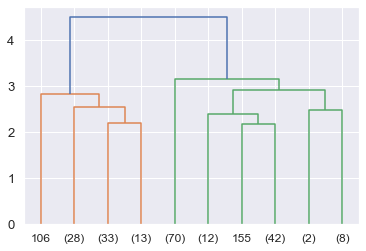

In [189]:
#Cutting the Dendrogram
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

In [190]:
#Using Max_clust and setting up a criterion
clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [191]:
cluster_dataset=df.copy()
cluster_dataset['clusters'] = clusters
cluster_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [192]:
#Cluster Frequency
cluster_dataset['clusters'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [193]:
#Cluster Profile: Adding the frequency to the dataset
agg_data=cluster_dataset.groupby('clusters').mean()
agg_data['Freq']=cluster_dataset['clusters'].value_counts().sort_index()
agg_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score

In [194]:
k_means = KMeans(n_clusters = 1)
k_means.fit(df_copy_Scaled)
k_means.inertia_

C:\Users\Kewal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1469.9999999999995

In [195]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_copy_Scaled)
k_means.inertia_

659.1717544870411

In [196]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_copy_Scaled)
k_means.inertia_

430.65897315130064

In [197]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_copy_Scaled)
k_means.inertia_

371.2419306631327

In [198]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_copy_Scaled)
k_means.inertia_

327.44250470083705

In [199]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_copy_Scaled)
k_means.inertia_

288.76945770226405

In [200]:
wss=[]

In [201]:
for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(df_copy_Scaled)
        wss.append(KM.inertia_)

C:\Users\Kewal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [202]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.18461253510196,
 326.5136953844313,
 290.9055205179616,
 262.29481969569133,
 240.88222796739157,
 222.578700372457,
 206.3140941882924]

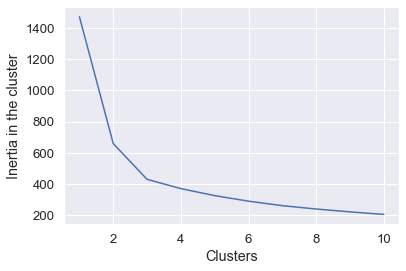

In [203]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [204]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_copy_Scaled)
labels = k_means.labels_

In [205]:
kmeans_dataset=df.copy()

In [206]:
kmeans_dataset["Clus_kmeans"] = labels
kmeans_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [207]:
silhouette_score(df_copy_Scaled,labels)

0.40072705527512986

In [208]:
from sklearn import metrics

In [209]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(df_copy_Scaled)
    scores.append(metrics.silhouette_score(df_copy_Scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.40072705527512986,
 0.3347542296283262,
 0.28621461554288646,
 0.285726896652541,
 0.2756098749293962,
 0.24943558736282168,
 0.2666366921192433,
 0.2731288488219916]

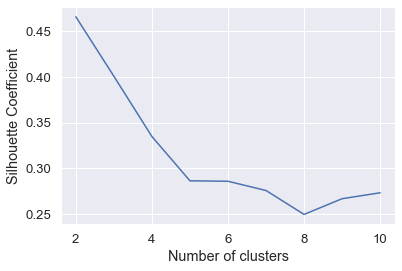

In [210]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [211]:
sil_width = silhouette_samples(df_copy_Scaled,labels)
sil_width

array([0.57369874, 0.36638639, 0.63778363, 0.51245819, 0.36227633,
       0.21844638, 0.4728666 , 0.36181217, 0.52028453, 0.5325168 ,
       0.46759191, 0.13224116, 0.38966769, 0.5247812 , 0.11221528,
       0.22129574, 0.33795723, 0.49990157, 0.03155344, 0.2357566 ,
       0.35903729, 0.36612754, 0.43277307, 0.26136159, 0.47570507,
       0.06575223, 0.2717924 , 0.50389413, 0.55352814, 0.43430599,
       0.37707319, 0.42823997, 0.38827268, 0.39498208, 0.5345933 ,
       0.55628078, 0.50760384, 0.42334973, 0.50496507, 0.62241469,
       0.56053376, 0.48652307, 0.39923175, 0.61098901, 0.51352958,
       0.37606912, 0.30715373, 0.58258949, 0.48825724, 0.53403992,
       0.31448221, 0.49548458, 0.58601272, 0.59926567, 0.61967102,
       0.23378798, 0.44189877, 0.5384123 , 0.57674252, 0.57696905,
       0.55410258, 0.51383032, 0.55412974, 0.28131787, 0.49622138,
       0.56495699, 0.57828489, 0.5237842 , 0.63205238, 0.08288516,
       0.44353914, 0.32042362, 0.54187254, 0.58284321, 0.29226

In [212]:
silhouette_samples(df_copy_Scaled,labels).min()

0.002713089347678376

## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [213]:
agg_data.T

clusters,1,2,3
spending,18.129200,11.916857,14.217077
advance_payments,16.058000,13.291000,14.195846
probability_of_full_payment,0.881595,0.846766,0.884869
current_balance,6.135747,5.258300,5.442000
credit_limit,3.648120,2.846000,3.253508
min_payment_amt,3.650200,4.619000,2.768418
max_spent_in_single_shopping,5.987040,5.115071,5.055569
Freq,75.000000,70.000000,65.000000


Cluster 1 = High Spending

Cluster 2 = Medium Spending

Cluster 3 = Low spending

Cluster 1: High Spending 
1. Giving any reward points might increase their purchases.
2. maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment.
3. Increase there credit limit and 
4. Increase spending habits.
5. Give loan against the credit card, as they are customers with good repayment record.
6. Tie up with luxary brands, which will drive more one_time_maximun spending.

Cluster 2: Medium Spending 
1. They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. 2. So we can increase credit limit or can lower down interest rate. 
3. Promote premium cards/loyality cars to increase transcations.
4. Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more.

Cluster 3: Low Spending Group
1. customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
2. Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)

# PROBLEM 2: CART-RF-ANN

In [214]:
df1=pd.read_csv("insurance_part2_data.csv")

# Q.2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis)

In [215]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [216]:
df1.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [217]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [218]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [219]:
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [220]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df1[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


Duplicate value is not being removed as theses data can be of different customers having the same Type of business, product, Destination.

In [221]:
for column in df1[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column,":",df1[column].nunique())
    print(df1[column].value_counts().sort_values())
    print('\n')

Agency_Code : 4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


Type : 2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


Claimed : 2
Yes     924
No     2076
Name: Claimed, dtype: int64


Channel : 2
Offline      46
Online     2954
Name: Channel, dtype: int64


Product Name : 5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


Destination : 3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




## Univariate Analysis:

## Age Variable

In [222]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


1. Minimum Age:  8

2. Maximum Age:  84

3. Mean value:  38.09

4. Median value:  36.0

5. Standard deviation: 10.46


In [223]:
#Extracting the Q1 and Q3 for age variable
Q1=df1['Age'].quantile(q=0.25)
Q3=df1['Age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Age is ', stats.iqr(df1['Age']))

1st Quartile (Q1) is:  32.0
3rd Quartile (Q3) is:  42.0
Interquartile range (IQR) of Age is  10.0


In [224]:
#Extracting the Lower and Upper Outliers
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Upper outliers in Age: ', Upper_outliers)
print('Lower outliers in Age: ', Lower_outliers)

Upper outliers in Age:  57.0
Lower outliers in Age:  17.0


In [225]:
#Extracting the Number of Outliers in upper and lower Outliers.
print('Number of outliers in Age upper : ', df1[df1['Age']>57.0]['Age'].count())
print('Number of outliers in Age lower : ', df1[df1['Age']<17.0]['Age'].count())

Number of outliers in Age upper :  198
Number of outliers in Age lower :  6


## Commission Variable

1. Minimum Commision:  0.0
2. Maximum Commision:  210.21
3. Mean value:  14.52
4. Median value:  4.63
5. Standard deviation:  25.48

In [226]:
#Extracting the Q1 and Q3 for Commision  variable
Q1=df1['Commision'].quantile(q=0.25)
Q3=df1['Commision'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Commision is ', stats.iqr(df1['Commision']))
#Extracting the Lower and Upper Outliers
print("")
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Upper outliers in Commision: ', Upper_outliers)
print('Lower outliers in Commision: ', Lower_outliers)
#Extracting the Number of Outliers in upper and lower Outliers.
print("")
print('Number of outliers in Commision upper : ', df1[df1['Commision']>43.0875]['Commision'].count())
print('Number of outliers in Commision lower : ', df1[df1['Commision']<-25.8525]['Commision'].count())

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  17.235
Interquartile range (IQR) of Commision is  17.235

Upper outliers in Commision:  43.0875
Lower outliers in Commision:  -25.8525

Number of outliers in Commision upper :  362
Number of outliers in Commision lower :  0


## Duration Variable:

1. Minimum Duration:  -1
2. Maximum Duration:  4580
3. Mean value:  70.00
4. Median value:  26.5
5. Standard deviation:  134.05

In [227]:
#Extracting the Q1 and Q3 for Duration variable
Q1=df1['Duration'].quantile(q=0.25)
Q3=df1['Duration'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Duration is ', stats.iqr(df1['Duration']))
print("")
#Extracting the Lower and Upper Outliers
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Upper outliers in Duration: ', Upper_outliers)
print('Lower outliers in Duration: ', Lower_outliers)
print("")
#Extracting the Number of Outliers in upper and lower Outliers.
print('Number of outliers in Commision upper : ', df1[df1['Duration']>141.0]['Duration'].count())
print('Number of outliers in Commision lower : ', df1[df1['Duration']<-67.0]['Duration'].count())

1st Quartile (Q1) is:  11.0
3rd Quartile (Q3) is:  63.0
Interquartile range (IQR) of Duration is  52.0

Upper outliers in Duration:  141.0
Lower outliers in Duration:  -67.0

Number of outliers in Commision upper :  382
Number of outliers in Commision lower :  0


## Sales Variable

1. Minimum Sales:  0.0
2. Maximum Sales:  539.0
3. Mean value:  60.24
4. Median value:  33.0
5. Standard deviation:  70.73

In [228]:
#Extracting the Q1 and Q3 for Duration variable
Q1=df1['Sales'].quantile(q=0.25)
Q3=df1['Sales'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Sales is ', stats.iqr(df1['Sales']))
print("")
#Extracting the Lower and Upper Outliers
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Upper outliers in Sales: ', Upper_outliers)
print('Lower outliers in Sales: ', Lower_outliers)
print("")
#Extracting the Number of Outliers in upper and lower Outliers.
print('Number of outliers in Commision upper : ', df1[df1['Sales']>141.0]['Sales'].count())
print('Number of outliers in Commision lower : ', df1[df1['Sales']<-67.0]['Sales'].count())

1st Quartile (Q1) is:  20.0
3rd Quartile (Q3) is:  69.0
Interquartile range (IQR) of Sales is  49.0

Upper outliers in Sales:  142.5
Lower outliers in Sales:  -53.5

Number of outliers in Commision upper :  353
Number of outliers in Commision lower :  0


In [229]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df1[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1[column])
    plt.show()

In [230]:
pca_num = df1.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(pca_num.columns.values)
len(lstnumericcolumns)

4

Description of Age
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


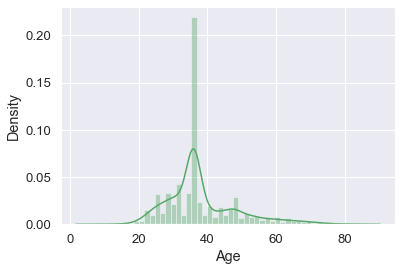

BoxPlot of Age
----------------------------------------------------------------------------


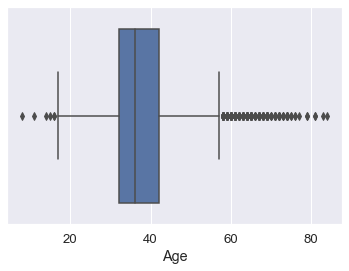

Description of Commision
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 Distribution of Commision
----------------------------------------------------------------------------


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


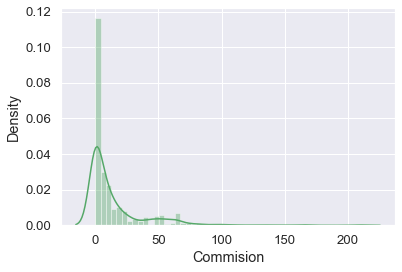

BoxPlot of Commision
----------------------------------------------------------------------------


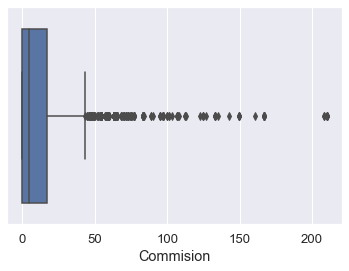

Description of Duration
----------------------------------------------------------------------------
count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 Distribution of Duration
----------------------------------------------------------------------------


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


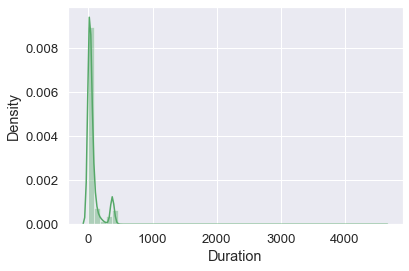

BoxPlot of Duration
----------------------------------------------------------------------------


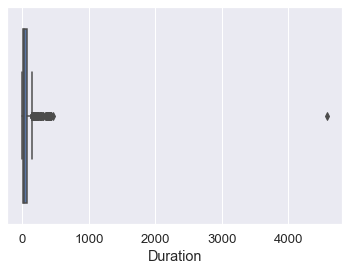

Description of Sales
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 Distribution of Sales
----------------------------------------------------------------------------


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


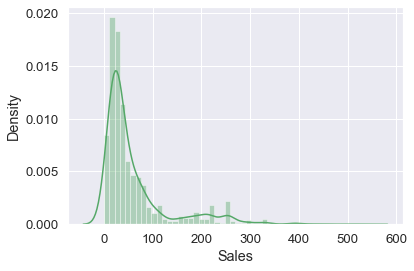

BoxPlot of Sales
----------------------------------------------------------------------------


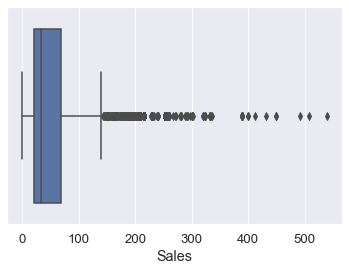

In [231]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [232]:
df1.nunique()

Age              70
Agency_Code       4
Type              2
Claimed           2
Commision       324
Channel           2
Duration        257
Sales           380
Product Name      5
Destination       3
dtype: int64

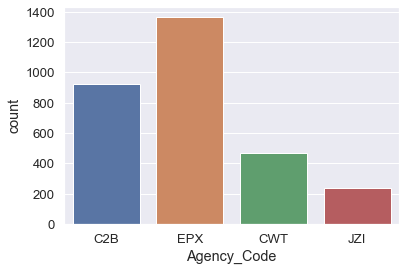

In [233]:
sns.countplot(data = df1, x = 'Agency_Code');

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

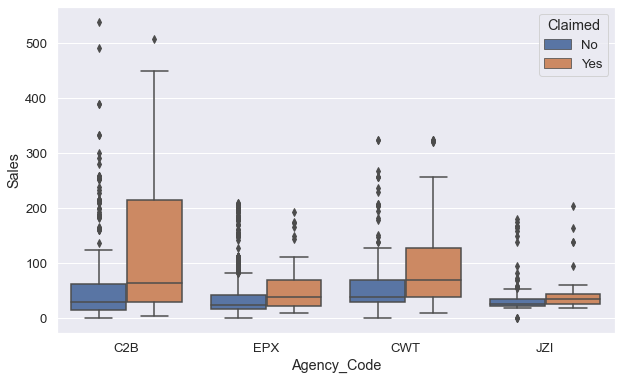

In [234]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df1, x='Agency_Code',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Type', ylabel='count'>

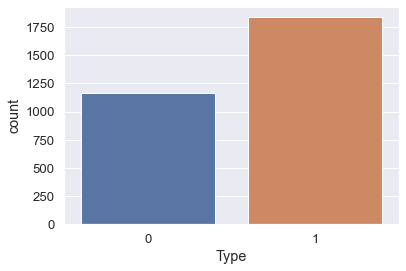

In [305]:
sns.countplot(data = df1, x = 'Type')

In [310]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df1, x='Type',y='Sales', hue='Claimed')

ValueError: Could not interpret input 'Claimed'

<Figure size 720x432 with 0 Axes>

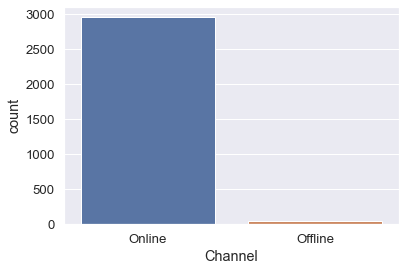

In [235]:
sns.countplot(data = df1, x = 'Channel');

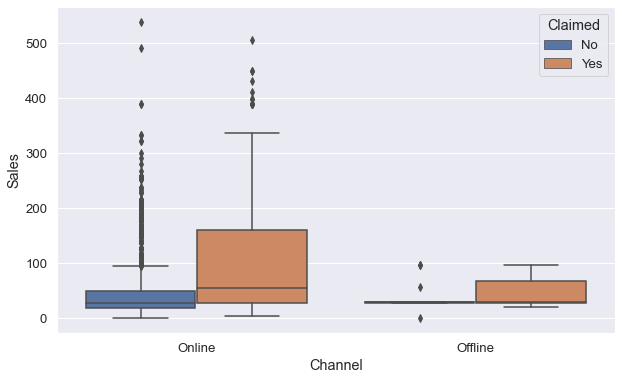

In [236]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df1, x='Channel',y='Sales', hue='Claimed');

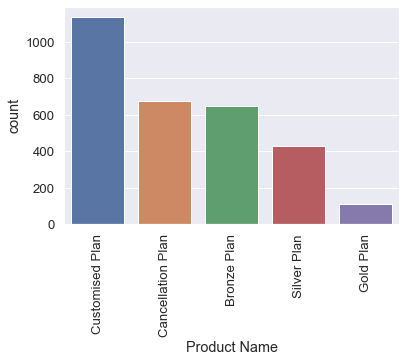

In [237]:
sns.countplot(data = df1, x = 'Product Name')
plt.xticks(rotation=90);

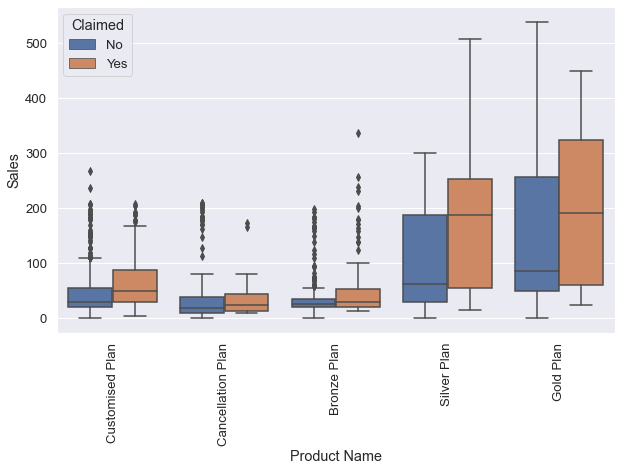

In [238]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df1, x='Product Name',y='Sales', hue='Claimed')
plt.xticks(rotation=90);

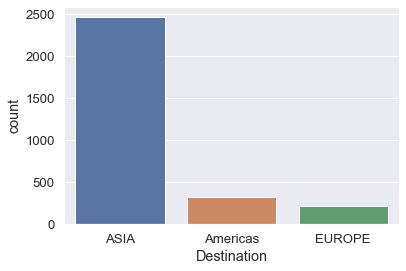

In [239]:
sns.countplot(data = df1, x = 'Destination');

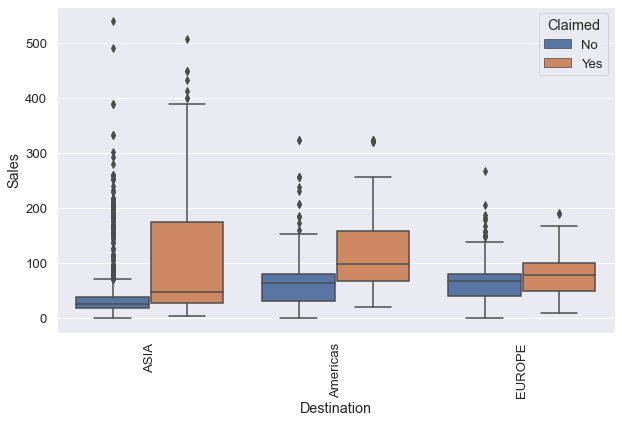

In [240]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df1, x='Destination',y='Sales', hue='Claimed')
plt.xticks(rotation=90);

## Multi Variate Anlysis

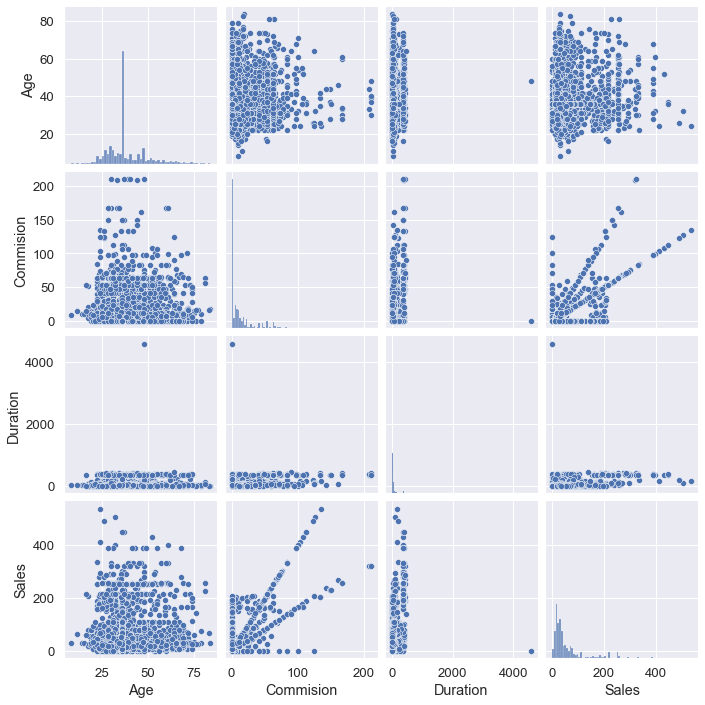

In [241]:
sns.pairplot(df1)

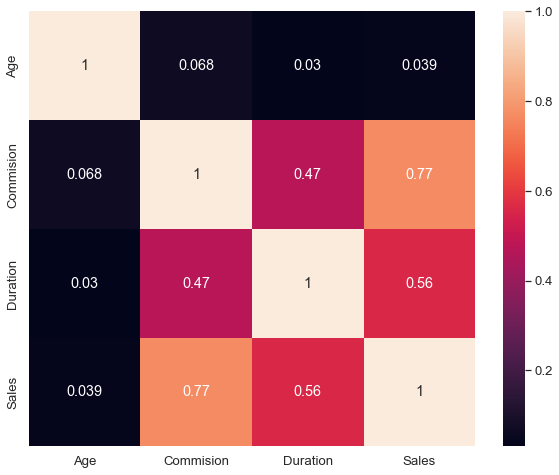

In [242]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df1.corr(), annot=True);

In [243]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [244]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [245]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [246]:
df1.Claimed.value_counts()

0    2076
1     924
Name: Claimed, dtype: int64

## Q.2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [247]:
#Extracting the target column into separate vectors for training set and test set
X = df1.drop("Claimed", axis=1)
y = df1.pop("Claimed")
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [248]:
# Scaling the attributes.
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


In [249]:
#Splitting data into training and test set
X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

In [250]:
#Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [251]:
param_grid_dtcl = {'criterion': ['gini'],'max_depth': [10,20,30,50],'min_samples_leaf': [50,100,150],'min_samples_split': [150,300,450],}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)
grid_search_dtcl

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20, 30, 50],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 300, 450]})

In [252]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [253]:
param_grid_dtcl = {'criterion': ['gini'],'max_depth': [3, 5, 7, 10,12],'min_samples_leaf': [20,30,40,50,60], 'min_samples_split': [150,300,450],}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [254]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [255]:
param_grid_dtcl = {'criterion': ['gini'],'max_depth': [3.5,4.0,4.5, 5.0,5.5],'min_samples_leaf': [40, 42, 44,46,48,50,52,54],'min_samples_split': [250, 270, 280, 290, 300,310],}
dtcl = DecisionTreeClassifier(random_state=1)

In [256]:
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 3.5, 'min_samples_leaf': 44, 'min_samples_split': 250}


DecisionTreeClassifier(max_depth=3.5, min_samples_leaf=44,
                       min_samples_split=250, random_state=1)

In [257]:
train_char_label = ['no', 'yes']

In [258]:
#Opening a dot file
tree_regularized = open('downloads:\tree_regularized.dot','w')

In [259]:
#Populating information to the dot file
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

In [260]:
#Closing the dot file
tree_regularized.close()

In [261]:
dot_data

In [262]:
#Imporatnce variable
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns))

                   Imp
Age           0.000000
Agency_Code   0.676527
Type          0.000000
Commision     0.008032
Channel       0.000000
Duration      0.000000
Sales         0.223015
Product Name  0.092427
Destination   0.000000


In [263]:
#Predicting on Training and Test dataset
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

In [264]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.656751,0.343249
1,0.935593,0.064407
2,0.935593,0.064407
3,0.656751,0.343249
4,0.935593,0.064407


In [265]:
#Building a random forest Classifier
param_grid_rfcl = {'max_depth': [7,10],'max_features': [4,6],'min_samples_leaf': [50,100],'min_samples_split': [150,300],'n_estimators': [301,501]}
rfcl = RandomForestClassifier(random_state=1)
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)


In [266]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)

{'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 50, 'min_samples_split': 300, 'n_estimators': 501}


In [267]:
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=50,
                       min_samples_split=300, n_estimators=501, random_state=1)

In [268]:
#Predicting the Training and testing data
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [269]:
#Extracting the predicting models and proba 
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.763145,0.236855
1,0.957879,0.042121
2,0.899905,0.100095
3,0.667343,0.332657
4,0.851731,0.148269


In [270]:
#Importance of variable
print (pd.DataFrame(best_grid_rfcl.feature_importances_,columns = ["Imp"],index = X_train.columns))

                   Imp
Age           0.007379
Agency_Code   0.391832
Type          0.072731
Commision     0.093041
Channel       0.000000
Duration      0.025512
Sales         0.127552
Product Name  0.278012
Destination   0.003941


In [271]:
#Building a artificial neural network
clf = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [2500,3000,4000], 
    'solver': ['sgd'],
    'tol': [0.01], 
}
ancl = MLPClassifier(random_state=1)

grid_search_ancl = GridSearchCV(estimator = ancl, param_grid = clf, cv = 10)

In [272]:
grid_search_ancl.fit(X_train, train_labels)
grid_search_ancl.best_params_
best_grid_ancl = grid_search_ancl.best_estimator_
best_grid_ancl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1,
              solver='sgd', tol=0.01)

In [273]:
#Predicting the Training and Testing data
ytrain_predict_ancl = best_grid_ancl.predict(X_train)
ytest_predict_ancl = best_grid_ancl.predict(X_test)

In [274]:
ytest_predict_prob_ancl=best_grid_ancl.predict_proba(X_test)
ytest_predict_prob_ancl
pd.DataFrame(ytest_predict_prob_ancl).head()

,0,1
0,0.758510,0.241490
1,0.800720,0.199280
2,0.796798,0.203202
3,0.710660,0.289340
4,0.731916,0.268084


## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model.

AUC: 0.810


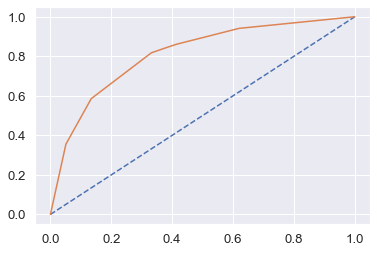

In [275]:
# AUC and ROC for the Train data
# predict probabilities
probs = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.799


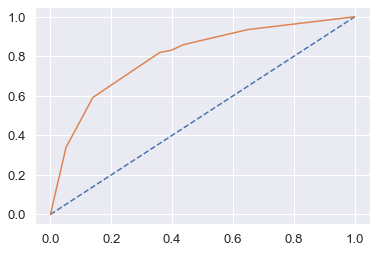

In [276]:
#AUC and ROC for the test data
# predict probabilities
probs = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [277]:
#Confusion Matrix and Classification Report for the training data
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1258,  195],
       [ 268,  379]], dtype=int64)

In [278]:
#Train Data Accuracy
train_acc=best_grid_dtcl.score(X_train,train_labels) 
train_acc

0.7795238095238095

In [279]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1453
           1       0.66      0.59      0.62       647

    accuracy                           0.78      2100
   macro avg       0.74      0.73      0.73      2100
weighted avg       0.77      0.78      0.78      2100



1. train_precision: 0.66
2. train_recall: 0.59
3. train_f1: 0.62

In [280]:
# Confusion Matrix and Classification Report for the testing data
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[536,  87],
       [113, 164]], dtype=int64)

In [281]:
#Test Data Accuracy
test_acc=best_grid_dtcl.score(X_test,test_labels)
test_acc

0.7777777777777778

In [282]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       623
           1       0.65      0.59      0.62       277

    accuracy                           0.78       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.78      0.77       900



1. test_precision:0.65
2. test_recall:0.59
3. test_f1: 0.62

# Classification tree conclusion:

Training Data
- AUC: 81%
- Accuracy: 78%
- Precision: 66%
- f1-Score: 62%

# Test Data:
- AUC: 79%
- Accuracy: 78%
- Precision: 83%
- f1-Score: 84%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is the most important variable for predicting diabetes

In [283]:
#Random Forest Model on training Data
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1308,  145],
       [ 323,  324]], dtype=int64)

In [284]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.7771428571428571

In [285]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1453
           1       0.69      0.50      0.58       647

    accuracy                           0.78      2100
   macro avg       0.75      0.70      0.71      2100
weighted avg       0.77      0.78      0.77      2100



1. rf_train_precision: 0.69
2. rf_train_recall: 0.50
3. rf_train_f1 : 0.58 

Area under Curve is 0.8233458250318321


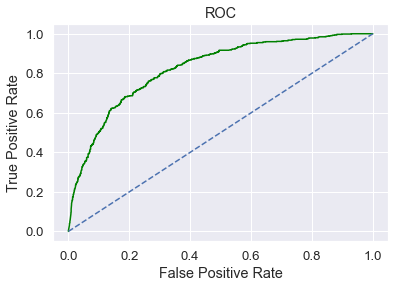

In [286]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [287]:
#Random Forest Model on test Data
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[558,  65],
       [138, 139]], dtype=int64)

In [288]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7744444444444445

In [289]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       623
           1       0.68      0.50      0.58       277

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



1. rf_test_precision  0.68
2. rf_test_recall  0.50
3. rf_test_f1  0.58

Area under Curve is 0.8107126921672818


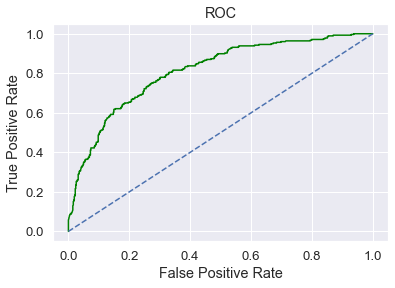

In [290]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

## Random Forest Conclusion

Train Data:
- AUC: 82%
- Accuracy: 77%
- Precision: 69%
- f1-Score: 58%

Test Data:
- AUC: 81%
- Accuracy: 77%
- Precision: 68%
- f1-Score: 58%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.



In [291]:
# Neural Network Model Performance Evaluation on Training data
confusion_matrix(train_labels,ytrain_predict_ancl)

array([[1340,  113],
       [ 396,  251]], dtype=int64)

In [292]:
an_train_acc=best_grid_ancl.score(X_train,train_labels) 
an_train_acc

0.7576190476190476

In [293]:
print(classification_report(train_labels,ytrain_predict_ancl))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1453
           1       0.69      0.39      0.50       647

    accuracy                           0.76      2100
   macro avg       0.73      0.66      0.67      2100
weighted avg       0.75      0.76      0.73      2100



1. train_precision:0.69
2. train_recall:0.39
3. train_f1: 0.50

Area under Curve is 0.7790697921796932


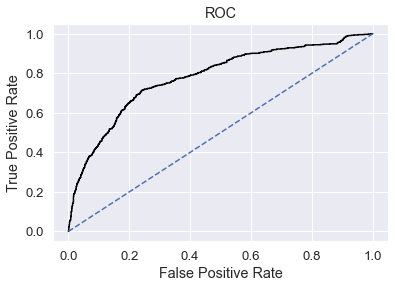

In [294]:
an_train_fpr, an_train_tpr,_=roc_curve(train_labels,best_grid_ancl.predict_proba(X_train)[:,1])
plt.plot(an_train_fpr,an_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
an_train_auc=roc_auc_score(train_labels,best_grid_ancl.predict_proba(X_train)[:,1])
print('Area under Curve is', an_train_auc)

In [295]:
#NN Model Performance Evaluation on Test data
confusion_matrix(test_labels,ytest_predict_ancl)

array([[576,  47],
       [171, 106]], dtype=int64)

In [296]:
an_test_acc=best_grid_ancl.score(X_test,test_labels)
an_test_acc

0.7577777777777778

In [297]:
print(classification_report(test_labels,ytest_predict_ancl))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       623
           1       0.69      0.38      0.49       277

    accuracy                           0.76       900
   macro avg       0.73      0.65      0.67       900
weighted avg       0.75      0.76      0.73       900



1. train_precision:0.69
2. train_recall:0.38
3. train_f1: 0.49

Area under Curve is 0.7587891360657353


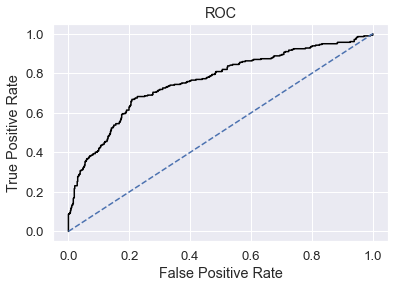

In [298]:
an_test_fpr, an_test_tpr,_=roc_curve(test_labels,best_grid_ancl.predict_proba(X_test)[:,1])
plt.plot(an_test_fpr,an_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
an_test_auc=roc_auc_score(test_labels,best_grid_ancl.predict_proba(X_test)[:,1])
print('Area under Curve is', an_test_auc)

Neural Network Conclusion
Train Data:
- AUC: 77%
- Accuracy: 76%
- Precision: 69%
- f1-Score: 5%

Test Data:
- AUC: 75%
- Accuracy: 76%
- Precision: 69%
- f1-Score: 49%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# Q. 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.¶
Comparison of the performance metrics from the 3 models

In [299]:
# Creating a comparative Data Frame to compare all the Models
clf_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df2=pd.DataFrame(clf_metrics).transpose()
train_f1=round(df2.loc["1"][2],2)
train_recall=round(df2.loc["1"][1],2)
train_precision=round(df2.loc["1"][0],2)
clf_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df2=pd.DataFrame(clf_metrics).transpose()
test_precision=round(df2.loc["1"][0],2)
test_recall=round(df2.loc["1"][1],2)
test_f1=round(df2.loc["1"][2],2)
#######
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df2=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df2.loc["1"][0],2)
rf_train_recall=round(df2.loc["1"][1],2)
rf_train_f1=round(df2.loc["1"][2],2)
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df2=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df2.loc["1"][0],2)
rf_test_recall=round(df2.loc["1"][1],2)
rf_test_f1=round(df2.loc["1"][2],2)
#######
an_metrics=classification_report(train_labels, ytrain_predict_ancl,output_dict=True)
df2=pd.DataFrame(an_metrics).transpose()
an_train_precision=round(df2.loc["1"][0],2)
an_train_recall=round(df2.loc["1"][1],2)
an_train_f1=round(df2.loc["1"][2],2)
an_metrics=classification_report(test_labels, ytest_predict_ancl,output_dict=True)
df=pd.DataFrame(an_metrics).transpose()
an_test_precision=round(df2.loc["1"][0],2)
an_test_recall=round(df2.loc["1"][1],2)
an_test_f1=round(df2.loc["1"][2],2)

In [300]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[train_acc,train_auc,train_recall,train_precision,train_f1],
        'Test':[test_acc,test_auc,test_recall,test_precision,test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[an_train_acc,an_train_auc,an_train_recall,an_train_precision,an_train_f1],
        'Neural Network Test':[an_test_acc,an_test_auc,an_test_recall,an_test_precision,an_test_f1]},index=index)
round(data,2)

,CART Train,Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.78,0.77,0.76,0.76
AUC,0.81,0.80,0.82,0.81,0.78,0.76
Recall,0.59,0.59,0.50,0.50,0.39,0.39
Precision,0.66,0.65,0.69,0.68,0.69,0.69
F1 Score,0.62,0.62,0.58,0.58,0.50,0.50


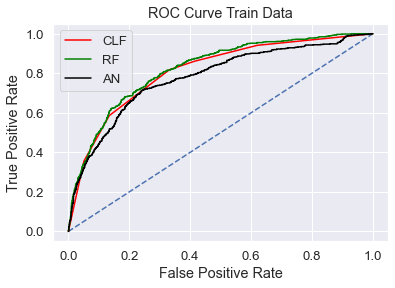

In [301]:
#Creating a comparitive ROC curve for Training Data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr,color='red',label="CLF")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(an_train_fpr,an_train_tpr,color='black',label="AN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train Data')
plt.legend();

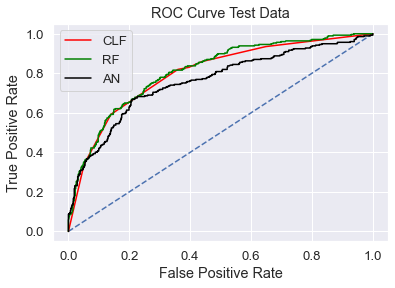

In [302]:
#Creating a comparitive ROC curve for Testing Data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr,color='red',label="CLF")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(an_test_fpr,an_test_tpr,color='black',label="AN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test Data')
plt.legend();

CONCLUSION :
I am selecting the RF model, as it has better accuracy, precsion, recall, f1 score better than other two CLF & AN

# Q.2.5 Inference: Basis on these predictions, what are the business insights and recommendations.
Mentioned in the Business Report.